## Multinomial Logistics Regression
### Dry Beans Classification
### https://github.com/santiagoahl/dry-beans-classification

In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
import joblib

In [90]:
warnings.filterwarnings('ignore')

In [91]:
# Data Import
df = pd.read_csv('../../../data/dry_bean.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [92]:
print(f'The bean classes are {df["Class"].unique()}')

The bean classes are ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


## Data preprocessing

In [93]:
# Duplicates dropping
df.drop_duplicates(inplace=True)

In [94]:
# Check Null Data
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## Balancing the dataset: SMOTE

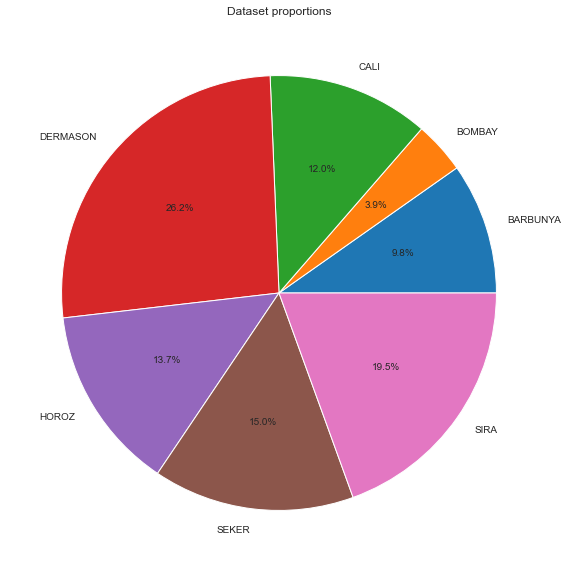

In [95]:
# Notice how unbalanced is the dataset
labels, counts = np.unique(df.Class, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

In [96]:
sm = SMOTE()

In [97]:
x = df.drop('Class', axis=1)
y = df.Class

In [98]:
x_sm, y_sm = sm.fit_resample(x, y)

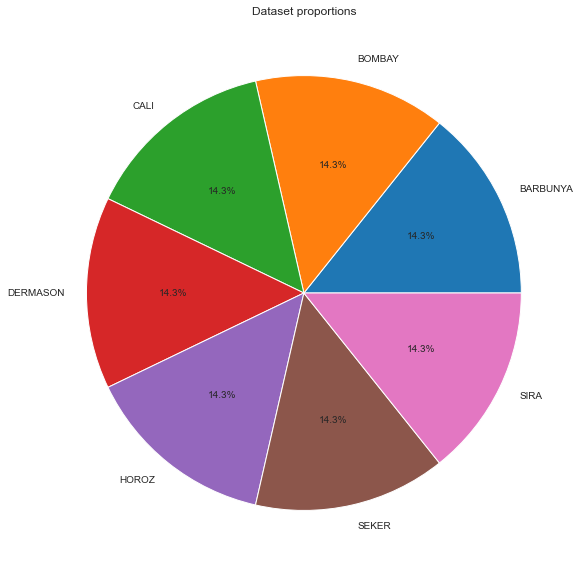

In [99]:
labels, counts = np.unique(y_sm, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

## Mapping

In [100]:
list(np.unique(y_sm))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [101]:
y_sm.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [i for i in range(len(np.unique(y_sm)))])

0        5
1        5
2        5
3        5
4        5
        ..
24817    6
24818    6
24819    6
24820    6
24821    6
Name: Class, Length: 24822, dtype: int64

## Drop correlated features

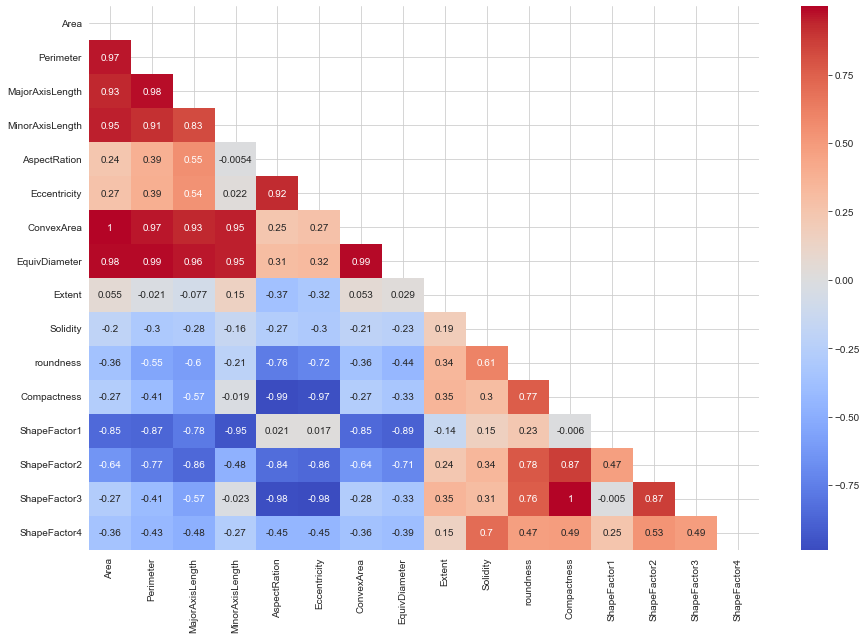

In [102]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df.corr(), cmap='coolwarm', mask=np.triu(df.corr()), annot=True)
plt.show()

We observe that ConvexArea is deeply correlated with Area, Perimeter, MajorAxisLength and MinorAxisLength.
EquivDiameter is also over correlated with several features. So we will drop both features.

In [103]:
x_sm.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

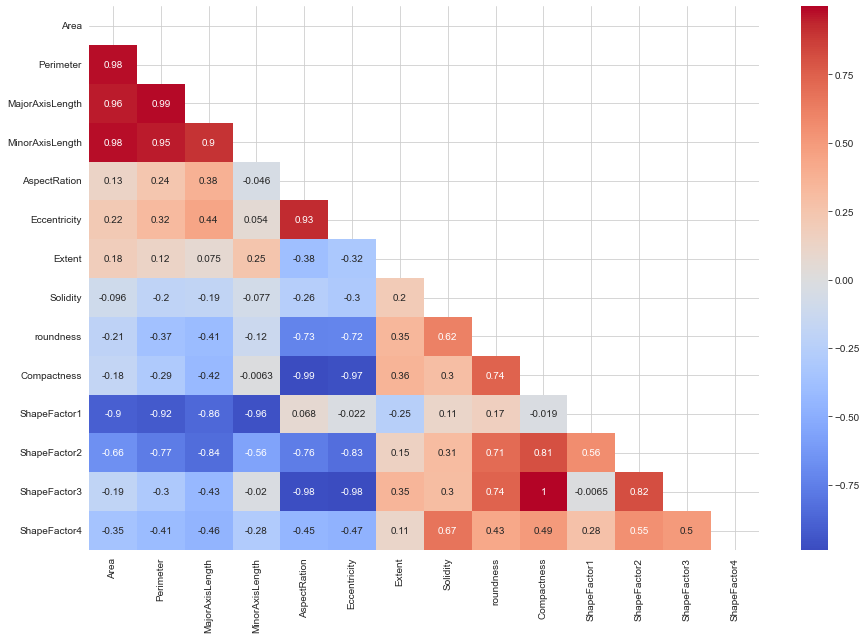

In [104]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=x_sm.corr(), cmap='coolwarm', mask=np.triu(x_sm.corr()), annot=True)
plt.show()

## Data split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, shuffle=True, test_size=0.2)

## Model Training

In [106]:
from sklearn2pmml.pipeline import PMMLPipeline

pipeline = PMMLPipeline([
    ("scalar", StandardScaler()),
    ("classifier", LogisticRegression(max_iter = 1000))
])

pipeline.fit(x_train, y_train)
pipeline.verify(x_train.sample(n = 10))

In [107]:
y_pred = pipeline.predict(x_test)
y_pred

array(['CALI', 'CALI', 'CALI', ..., 'SIRA', 'SIRA', 'SEKER'], dtype=object)

## Model Testing

In [108]:
print(f'The model accuracy is: {np.round(accuracy_score(y_test, y_pred), decimals=3)*100}%')

The model accuracy is: 94.39999999999999%


In [109]:
print(f'The model f1 score is: {np.round(f1_score(y_test, y_pred, average="""weighted"""), decimals=3)*100}%')

The model f1 score is: 94.39999999999999%


<Figure size 1440x1440 with 0 Axes>

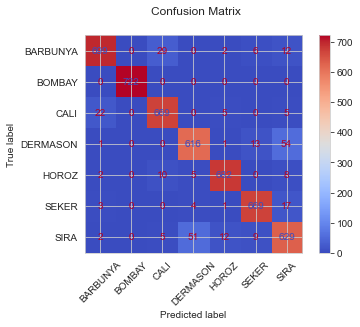

In [117]:
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

plt.figure(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='coolwarm')
plt.xticks(rotation=45)
plt.suptitle('Confusion Matrix')
plt.show()

## Export the model in PMML format

In [111]:
from sklearn2pmml import sklearn2pmml, make_pmml_pipeline

sklearn2pmml(pipeline, "../../../data/LogisticsRegressionDryBeansClassification.pmml")

## Model Scoring

In [112]:
from jpmml_evaluator import make_evaluator
from jpmml_evaluator.py4j import Py4JBackend

# Load PMML model
backend  = Py4JBackend()
evaluator = make_evaluator(backend=backend, path="../../../data/LogisticsRegressionDryBeansClassification.pmml")

In [113]:
# Perform automated QA
evaluator.verify()

In [114]:
dfresult = evaluator.evaluateAll(x_test)

In [115]:
dfresult

,Class,probability(BARBUNYA),probability(BOMBAY),probability(CALI),probability(DERMASON),probability(HOROZ),probability(SEKER),probability(SIRA)
0,CALI,0.005320,1.759204e-06,0.587561,3.399697e-05,7.916393e-02,1.858452e-05,3.279016e-01
1,CALI,0.003697,8.086111e-05,0.995983,1.303056e-10,9.237156e-05,3.607044e-07,1.468958e-04
2,CALI,0.000112,1.871950e-05,0.989271,5.646123e-09,2.790394e-03,5.050746e-10,7.808278e-03
3,BOMBAY,0.000037,9.998362e-01,0.000127,3.579031e-31,6.293541e-17,2.532218e-15,2.476092e-20
4,CALI,0.000766,5.621309e-05,0.998781,5.185274e-11,2.519426e-04,2.323528e-08,1.449078e-04
...,...,...,...,...,...,...,...,...
4960,SIRA,0.000029,1.099344e-11,0.000011,4.565962e-01,1.411888e-02,3.536322e-04,5.288909e-01
4961,BARBUNYA,0.999774,8.127559e-07,0.000133,3.959702e-10,2.928020e-07,2.632852e-05,6.515341e-05
4962,SIRA,0.000125,4.299635e-09,0.002989,8.832807e-03,3.467936e-02,1.968967e-04,9.531772e-01
4963,SIRA,0.000170,1.001032e-09,0.000021,1.098791e-01,7.792605e-04,2.535393e-04,8.888976e-01
